In [1]:
import Pkg
using Revise
using SQRLab

In [2]:

using IonSim
using QuantumOptics
using PyPlot

In [3]:
t = create_standard_chamber()
names(SQRLab)

8-element Vector{Symbol}:
 :SQRLab
 :bfield_detune
 :create_standard_chamber
 :pi2_pulse
 :run_ramsey
 :run_simulation
 :run_simulation_hamiltonian
 :simple_pulse

In [4]:
using Printf
function print_pulse_schedule(chamber; t_start=0.0, t_end=30.0, step=0.1)
        L = chamber.lasers[1]
        I_func = L.I
        phi_func = L.ϕ
        
        println("\n--- Laser Pulse Schedule ---")
        println("Time (μs) | Intensity (W/m²)     | Phase (rad)")
        println("----------------------------------------------")
        
        # We assume 't' is in microseconds because hamiltonian(timescale=1e-6) is used
        for t in t_start:step:t_end
            i_val = I_func(t)
            p_val = phi_func(t)
            
            # Only print lines where the laser is ON to keep output clean
            if i_val > 1e-9
                # Format: Time aligned right, Intensity scientific, Phase fixed
                Printf = @eval using Printf
                @Printf.printf "%9.2f | %18.2e | %5.2f\n" t i_val p_val
            end
        end
        println("----------------------------------------------\n")
    end

print_pulse_schedule (generic function with 1 method)

In [5]:
waittime = 4:0.1:10
@time x, y = run_ramsey(t, waittime, 1e-6)

print_pulse_schedule(t)

 61.197966 seconds (47.97 M allocations: 2.198 GiB, 1.18% gc time, 99.22% compilation time: <1% of which was recompilation)

--- Laser Pulse Schedule ---
Time (μs) | Intensity (W/m²)     | Phase (rad)
----------------------------------------------
     0.00 |           1.03e+06 |  0.00
     0.10 |           1.03e+06 |  0.00
     0.20 |           1.03e+06 |  0.00
     0.30 |           1.03e+06 |  0.00
     0.40 |           1.03e+06 |  0.00
     0.50 |           1.03e+06 |  0.00
     0.60 |           1.03e+06 |  0.00
     0.70 |           1.03e+06 |  0.00
     0.80 |           1.03e+06 |  0.00
     0.90 |           1.03e+06 |  0.00
     1.00 |           1.03e+06 |  0.00
     1.10 |           1.03e+06 |  0.00
     1.20 |           1.03e+06 |  0.00
     1.30 |           1.03e+06 |  0.00
     1.40 |           1.03e+06 |  0.00
     1.50 |           1.03e+06 |  0.00
     1.60 |           1.03e+06 |  0.00
     1.70 |           1.03e+06 |  0.00
     1.80 |           1.03e+06 |  0.00
     1.90 |

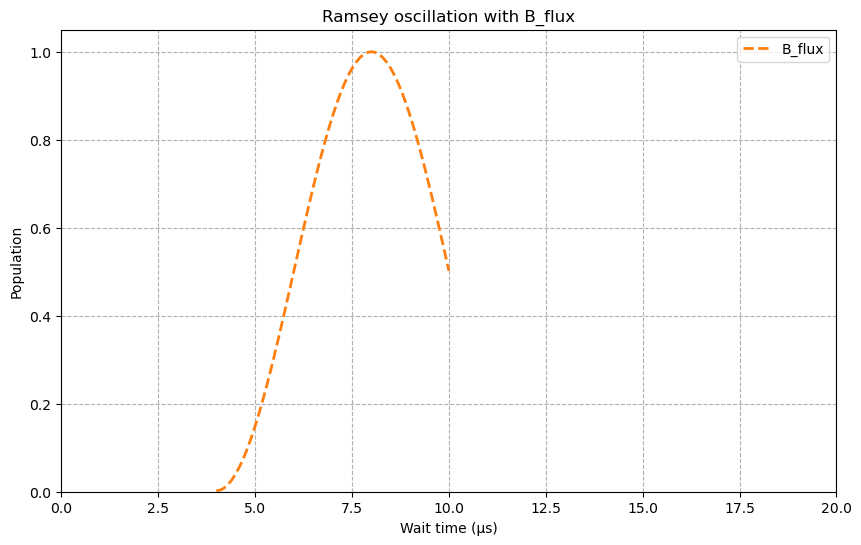

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


In [6]:
figure(figsize=(10, 6))
plot(x, y, label="B_flux", color="C1", linestyle="--", linewidth=2)
xlim(0, 20)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

In [ ]:
waittime = 4:0.1:10
bpsan = 1e-6:1e-6:3e-6
figure(figsize=(10, 6))
cnt = 0
for b in bpsan

    @time x, y = run_ramsey(t, waittime, b)
    plot(x, y, label="B_flux = $(b)", color="C$cnt", linestyle="--", linewidth=2)
    
    cnt=cnt+1
end
xlim(0, 20)
xlabel("Wait time (μs)")
ylabel("Population")
title("Ramsey oscillation with B_flux")
ylim(0, 1.05)

grid(true, linestyle="--")
legend()
show()
display(gcf())

320.200660 seconds (10.53 M allocations: 402.498 MiB, 0.02% gc time, 99.74% compilation time: <1% of which was recompilation)


In [1]:
display(gcf())

UndefVarError: UndefVarError: `gcf` not defined in `Main`
Suggestion: check for spelling errors or missing imports.